The following cell will use the `pandas` library to read in a CSV file of survey responses from 19,717 data scientists collected by Kaggle. It will then use the `matplotlib` and `seaborn` libraries to create a horizontal bar chart showing which languages are most recommended.

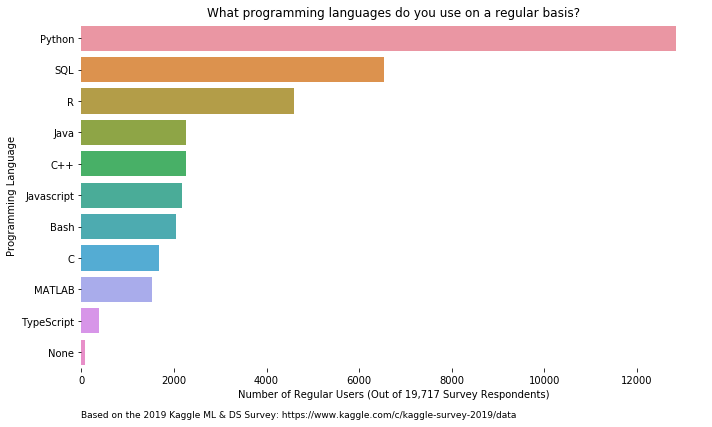

In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the kaggle data science survey data for 2019 into a Pandas dataframe (similar to an Excel spreadsheet)
# We use the `skiprow` keyword argument to skip row 1 because it only contains question descriptions
survey_responses = pd.read_csv("multiple_choice_responses.csv", skiprows=[1])

# Initialize the figure size
f, ax = plt.subplots(figsize=(10, 6))

# Plot the number of users of each programming language, sorted by popularity
# Q18 is the question related to language usage. The question is split into 11 languages
# For each question, the rows are language names e.g. "Python" or "R"
# We first make a new dataframe which just has the languages and the count of each one
# We then sort the languages by popularity
language_counts = {}
for language_number in range(1, 12):
    language_column = survey_responses["Q18_Part_" + str(language_number)]
    language_counts.update(dict(language_column.value_counts()))
language_count_data = pd.DataFrame({"Language": list(language_counts.keys()), "Count": list(language_counts.values())})
language_count_data = language_count_data.sort_values('Count', ascending=False)

# We can now plot the language counts in the new dataframe as a barplot
sns.barplot(x="Count", y="Language", data=language_count_data)

# Add an informative title and axes labels
plt.title("What programming languages do you use on a regular basis?")
ax.set(ylabel="Programming Language",
       xlabel="Number of Regular Users (Out of 19,717 Survey Respondents)")
# Note the source
ax.text(-0.0, -0.15, "Based on the 2019 Kaggle ML & DS Survey: https://www.kaggle.com/c/kaggle-survey-2019/data", ha="left", va="bottom", size="9", transform=ax.transAxes)

# Remove the box around the figure
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Save the figure to a file to include in a paper or website
plt.savefig("data_science_languages.png", dpi=320)